In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [52]:
# folder_name = "conv_evals_scaled_weighted_fv_b_and_white_mse_lr1e4"
folder_name = "linear_MO_FV_evals_scaled_b_and_w_mse_lr1e4_fixed"

batch_filename = "batch_metrics.csv"
epoch_filename = "epoch_metrics.csv"
predictions_filename =  "predictions.csv"
step_size = 1

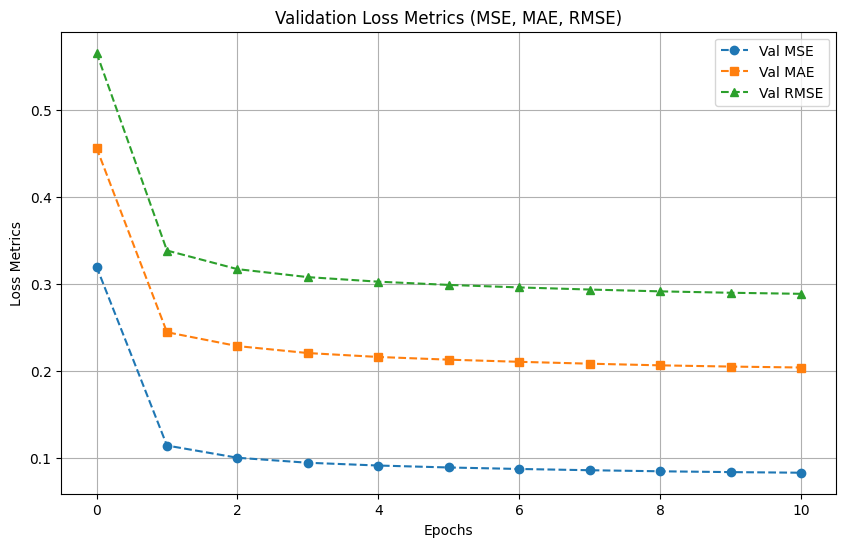

In [53]:
# Load the CSV file
csv_file_path = f"{folder_name}/{epoch_filename}"  # Update with actual path if different
data = pd.read_csv(csv_file_path)

# Plot 1: Loss Metrics (MSE, MAE, RMSE) for Train & Validation
plt.figure(figsize=(10, 6))
# plt.ylim(0, 1)  # Sets the Y-axis range from 0 to 1
# plt.plot(data["epoch"], data["train_mse"], label="Train MSE", marker="o", linestyle="-")
plt.plot(data["epoch"], data["val_mse"], label="Val MSE", marker="o", linestyle="--")
# plt.plot(data["epoch"], data["train_mae"], label="Train MAE", marker="s", linestyle="-")
plt.plot(data["epoch"], data["val_mae"], label="Val MAE", marker="s", linestyle="--")
# plt.plot(data["epoch"], data["train_rmse"], label="Train RMSE", marker="^", linestyle="-")
plt.plot(data["epoch"], data["val_rmse"], label="Val RMSE", marker="^", linestyle="--")

plt.xlabel("Epochs")
plt.ylabel("Loss Metrics")
plt.title("Validation Loss Metrics (MSE, MAE, RMSE)")
plt.legend()
plt.grid(True)
plt.show()


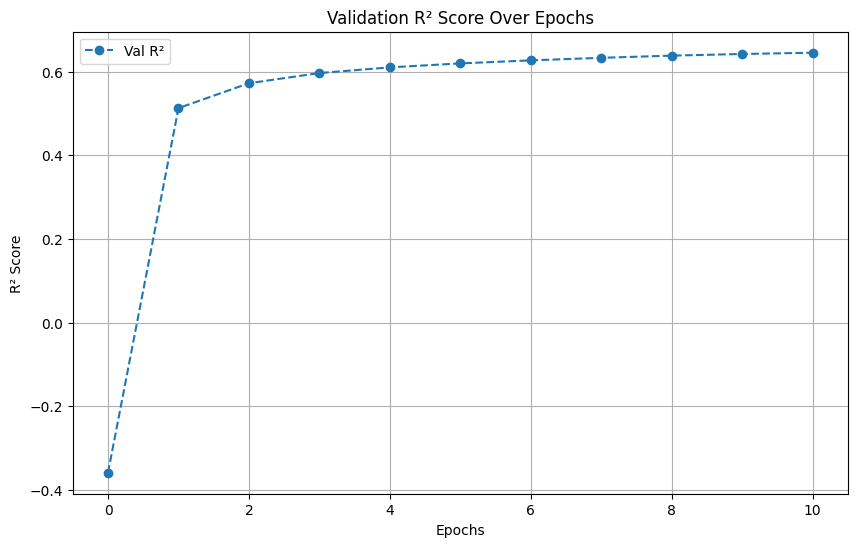

In [54]:

# Plot 2: R² Scores for Train & Validation
plt.figure(figsize=(10, 6))
#plt.ylim(0, 1)  # Sets the Y-axis range from 0 to 1
# plt.plot(data["epoch"], data["train_r2"], label="Train R²", marker="o", linestyle="-")
plt.plot(data["epoch"], data["val_r2"], label="Val R²", marker="o", linestyle="--")

plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("Validation R² Score Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

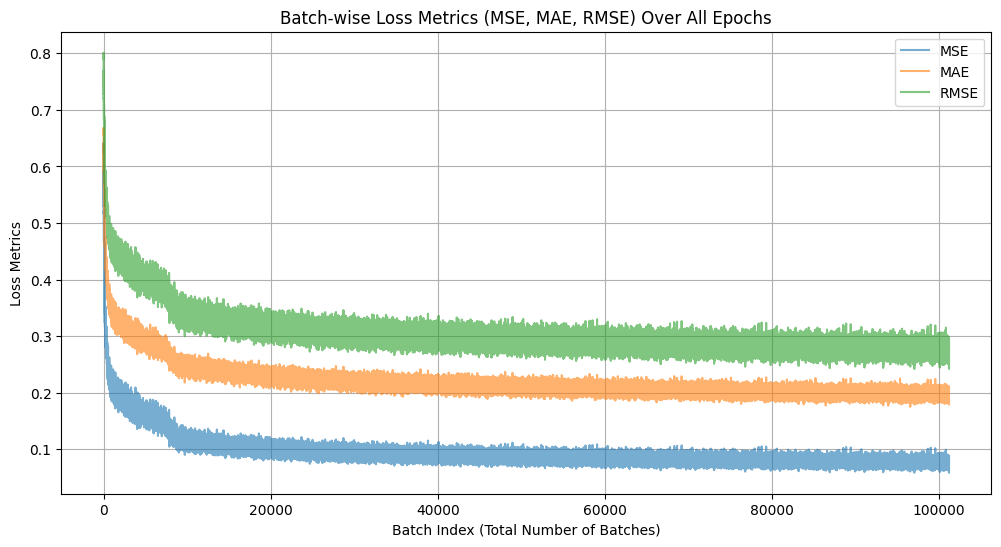

In [55]:
# Load the batch-wise metrics CSV file
batch_csv_file_path = f"{folder_name}/{batch_filename}"  # Update with actual path if differe
batch_data = pd.read_csv(batch_csv_file_path)

# Create a sequential batch index (number of rows as batches)
batch_data = batch_data.iloc[::step_size, :]
# batch_data["batch_index"] = range(1, len(batch_data) + 1)

# Plot 1: Loss Metrics (MSE, MAE, RMSE) per Batch (All Epochs Combined)
plt.figure(figsize=(12, 6))
plt.plot(batch_data["id"], batch_data["mse"], label="MSE", linestyle="-", alpha=0.6)
plt.plot(batch_data["id"], batch_data["mae"], label="MAE", linestyle="-", alpha=0.6)
plt.plot(batch_data["id"], batch_data["rmse"], label="RMSE", linestyle="-", alpha=0.6)

plt.xlabel("Batch Index (Total Number of Batches)")
plt.ylabel("Loss Metrics")
plt.title("Batch-wise Loss Metrics (MSE, MAE, RMSE) Over All Epochs")
plt.legend()
plt.grid(True)
plt.show()


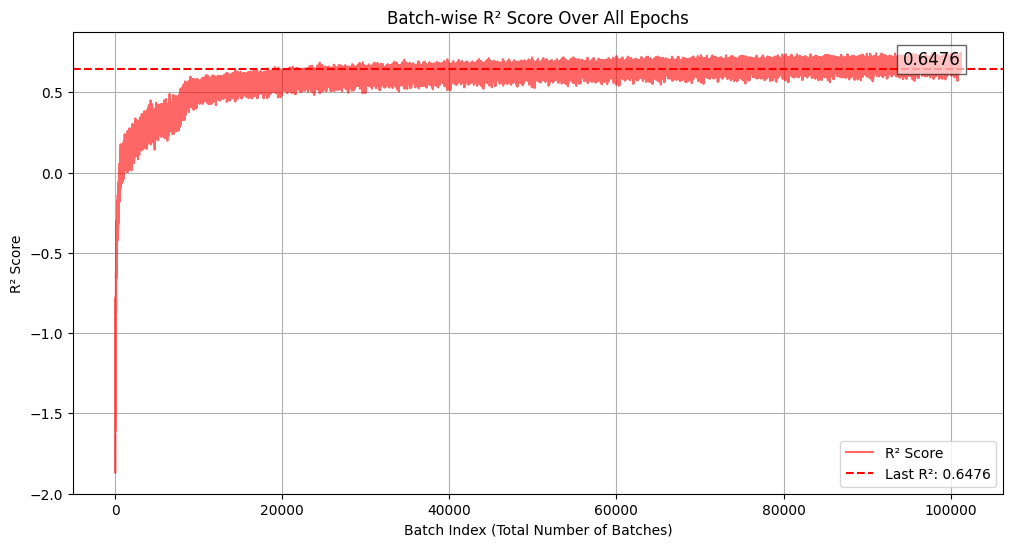

In [56]:
# Get the last R² value in the dataset
last_r2_value = batch_data["r2"].iloc[-1]
last_r2_index = batch_data["id"].iloc[-1]

# Plot R² Score per Batch
plt.figure(figsize=(12, 6))
plt.plot(batch_data["id"], batch_data["r2"], label="R² Score", linestyle="-", color="red", alpha=0.6)

# Add horizontal red line at the last recorded R² value
plt.axhline(y=last_r2_value, color="red", linestyle="--", linewidth=1.5, label=f"Last R²: {last_r2_value:.4f}")

# Add text annotation showing the exact last R² value
plt.text(last_r2_index, last_r2_value, f"{last_r2_value:.4f}", 
         verticalalignment='bottom', horizontalalignment='right', 
         color="black", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Labels, Title, and Legend
plt.xlabel("Batch Index (Total Number of Batches)")
plt.ylabel("R² Score")
plt.title("Batch-wise R² Score Over All Epochs")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

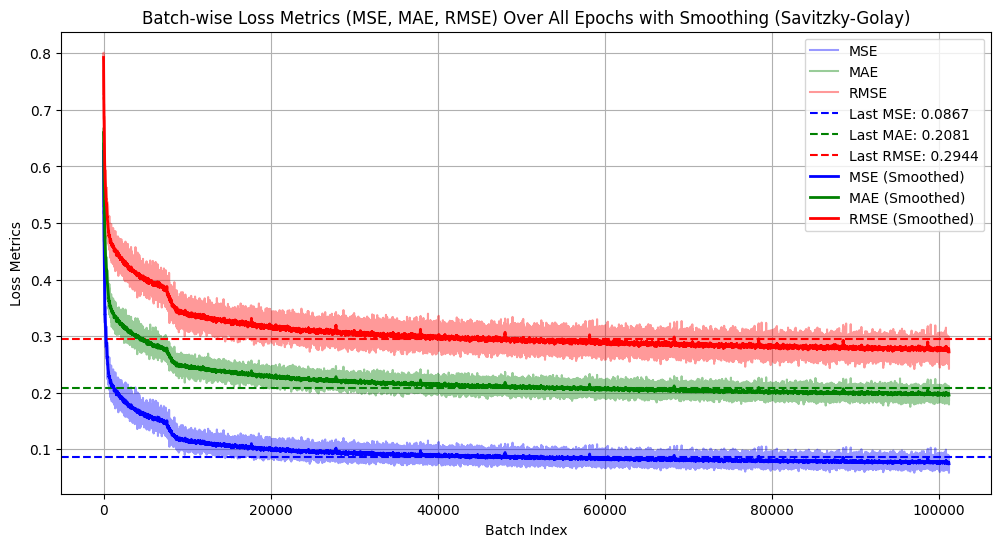

In [57]:
# Reload the batch metrics CSV file
csv_file_path = batch_csv_file_path
batch_data = pd.read_csv(csv_file_path)

# Downsample data: Take every 1000th record to smooth out variations
step_size = 1  # Adjust if necessary
window_size = 100  # Window size for smoothing
poly_order = 2  # Polynomial order for Savitzky-Golay filter

batch_data_sampled = batch_data.iloc[::step_size, :]
# batch_data_sampled["batch_index"] = range(1, len(batch_data_sampled) + 1)

# Ensure window size is valid
window_size = min(window_size, len(batch_data_sampled))

# Apply Savitzky-Golay filter for smooth approximation
smooth_mse = savgol_filter(batch_data_sampled["mse"], window_size, poly_order)
smooth_mae = savgol_filter(batch_data_sampled["mae"], window_size, poly_order)
smooth_rmse = savgol_filter(batch_data_sampled["rmse"], window_size, poly_order)

last_mse_value = batch_data_sampled["mse"].iloc[-1]
last_mse_index = batch_data_sampled["id"].iloc[-1]

last_mae_value = batch_data_sampled["mae"].iloc[-1]
last_mae_index = batch_data_sampled["id"].iloc[-1]

last_rmse_value = batch_data_sampled["rmse"].iloc[-1]
last_rmse_index = batch_data_sampled["id"].iloc[-1]

# Plot Loss Metrics (MSE, MAE, RMSE) per Batch with Smoothed Lines
plt.figure(figsize=(12, 6))

# Original lines
plt.plot(batch_data_sampled["id"], batch_data_sampled["mse"], label="MSE", linestyle="-", alpha=0.4, color='blue')
plt.plot(batch_data_sampled["id"], batch_data_sampled["mae"], label="MAE", linestyle="-", alpha=0.4, color='green')
plt.plot(batch_data_sampled["id"], batch_data_sampled["rmse"], label="RMSE", linestyle="-", alpha=0.4, color='red')

plt.axhline(y=last_mse_value, color="blue", linestyle="--", linewidth=1.5, label=f"Last MSE: {last_mse_value:.4f}")
plt.axhline(y=last_mae_value, color="green", linestyle="--", linewidth=1.5, label=f"Last MAE: {last_mae_value:.4f}")
plt.axhline(y=last_rmse_value, color="red", linestyle="--", linewidth=1.5, label=f"Last RMSE: {last_rmse_value:.4f}")

# Smoothed lines
plt.plot(batch_data_sampled["id"], smooth_mse, label="MSE (Smoothed)", linestyle="-", linewidth=2, color='blue')
plt.plot(batch_data_sampled["id"], smooth_mae, label="MAE (Smoothed)", linestyle="-", linewidth=2, color='green')
plt.plot(batch_data_sampled["id"], smooth_rmse, label="RMSE (Smoothed)", linestyle="-", linewidth=2, color='red')

# Labels and Title
# plt.xlabel(f"Batch Index (Sampled Rate 1/{step_size})")
plt.xlabel(f"Batch Index")
plt.ylabel("Loss Metrics")
plt.title("Batch-wise Loss Metrics (MSE, MAE, RMSE) Over All Epochs with Smoothing (Savitzky-Golay)")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

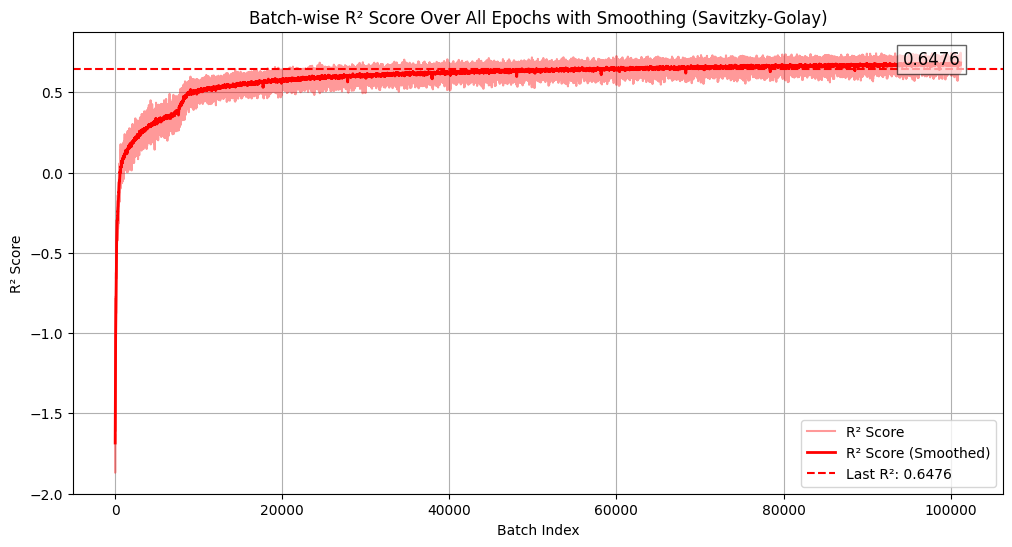

In [58]:
# Apply Savitzky-Golay filter for smooth approximation on R² values
smooth_r2 = savgol_filter(batch_data_sampled["r2"], window_size, poly_order)

# Get the last R² value and index in the dataset
last_r2_value = batch_data_sampled["r2"].iloc[-1]
last_r2_index = batch_data_sampled["id"].iloc[-1]

# Plot R² Score per Batch with Smoothed Line
plt.figure(figsize=(12, 6))

# Original line
plt.plot(batch_data_sampled["id"], batch_data_sampled["r2"], label="R² Score", linestyle="-", color="red", alpha=0.4)

# Smoothed line
plt.plot(batch_data_sampled["id"], smooth_r2, label="R² Score (Smoothed)", linestyle="-", linewidth=2, color="red")

# Add horizontal red line at the last recorded R² value
plt.axhline(y=last_r2_value, color="red", linestyle="--", linewidth=1.5, label=f"Last R²: {last_r2_value:.4f}")

# Add text annotation showing the exact last R² value
plt.text(last_r2_index, last_r2_value, f"{last_r2_value:.4f}", 
         verticalalignment='bottom', horizontalalignment='right', 
         color="black", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Labels, Title, and Legend
plt.xlabel("Batch Index")
plt.ylabel("R² Score")
plt.title("Batch-wise R² Score Over All Epochs with Smoothing (Savitzky-Golay)")
plt.legend()
plt.grid(True)

# Show Plot



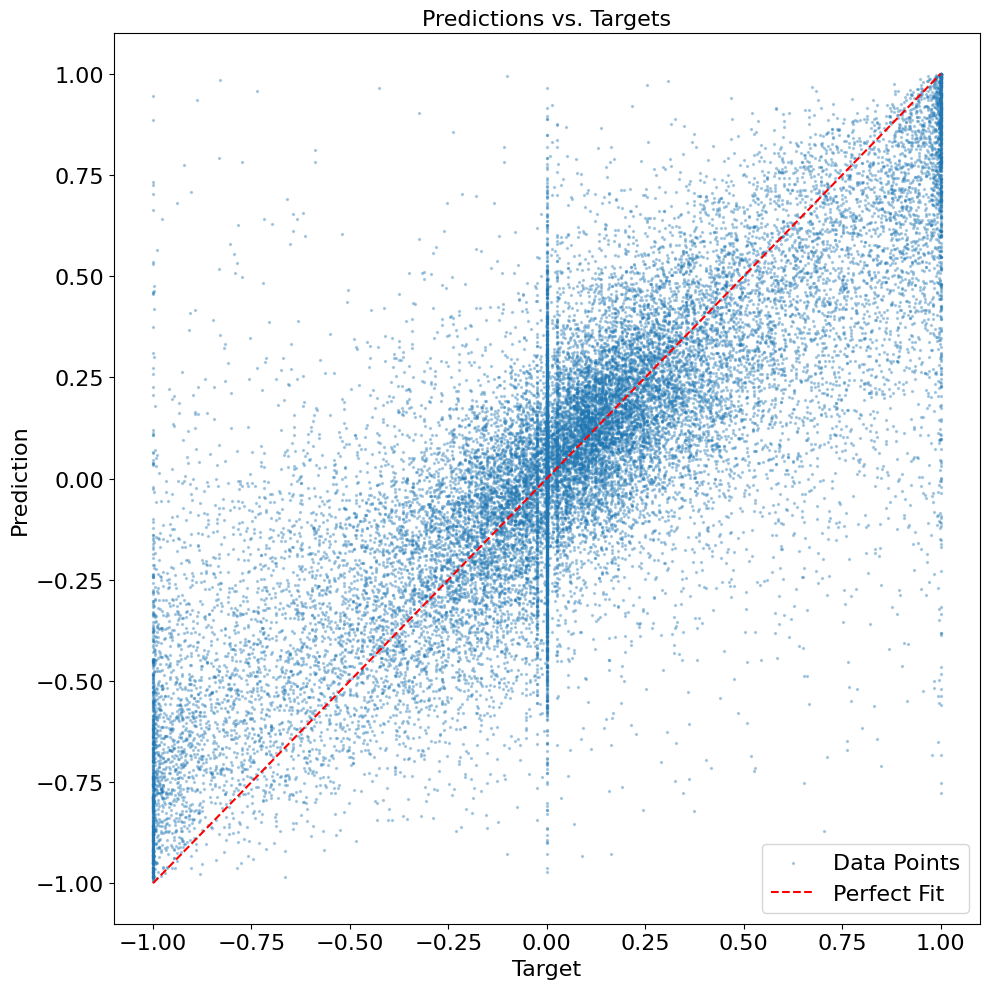

In [59]:
predictions_path = f"{folder_name}/{predictions_filename}"
sample_rate = 50
fontsize = 16

df = pd.read_csv(predictions_path)

# 2) Extract columns
# Adjust these column names if your CSV uses different ones
df = df.iloc[::sample_rate, :]
targets = df["target"]
preds   = df["prediction"]

# 3) Create scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(targets, preds, s=2, alpha=0.3, label="Data Points")

plt.xlabel("Target", fontsize=fontsize)
plt.ylabel("Prediction", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title("Predictions vs. Targets", fontsize=fontsize)

# 4) Perfect fit line (y = x)
min_val = min(targets.min(), preds.min())
max_val = max(targets.max(), preds.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Fit")

plt.legend(fontsize=fontsize)
plt.tight_layout()

# 5) Show (or save) the plot
plt.show()
# If you prefer saving instead of showing:
# plt.savefig("predictions_vs_targets.png", dpi=300)

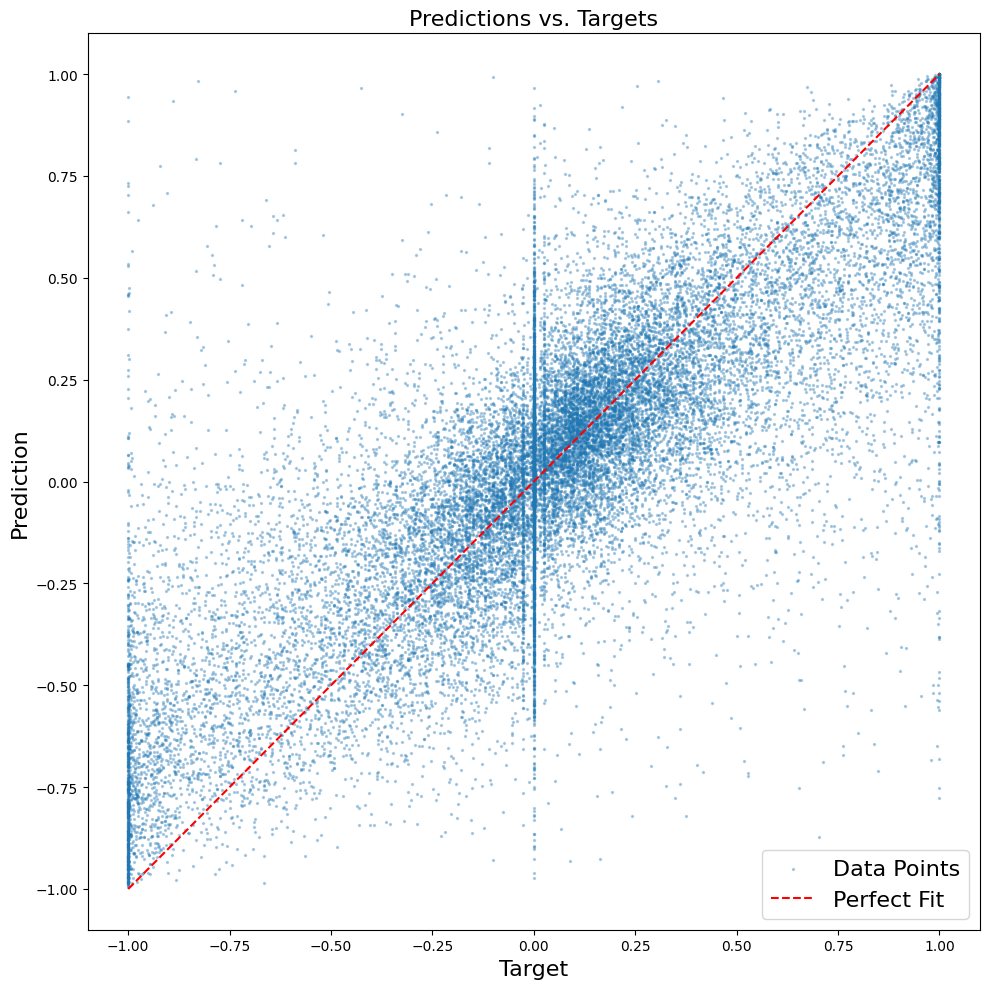

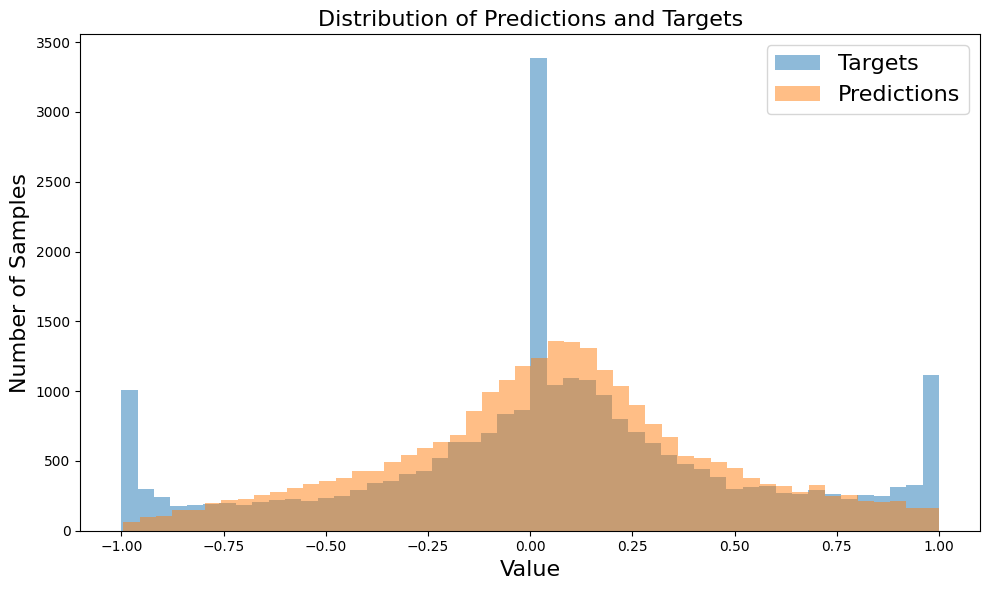

In [64]:
# Load predictions CSV (update the path if needed)
predictions_path = f"{folder_name}/{predictions_filename}"
sample_rate = 50
fontsize = 16

# Read the CSV file
df = pd.read_csv(predictions_path)

# Extract columns and downsample
df = df.iloc[::sample_rate, :]
targets = df["target"]
preds = df["prediction"]

# 1) Scatter Plot: Predictions vs. Targets
plt.figure(figsize=(10, 10))
plt.scatter(targets, preds, s=2, alpha=0.3, label="Data Points")
plt.xlabel("Target", fontsize=fontsize)
plt.ylabel("Prediction", fontsize=fontsize)
plt.title("Predictions vs. Targets", fontsize=fontsize)

# Perfect fit line (y = x)
min_val = min(targets.min(), preds.min())
max_val = max(targets.max(), preds.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Fit")
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.show()

# 2) Histogram: Distribution of Predictions and Targets
plt.figure(figsize=(10, 6))
plt.hist(targets, bins=50, alpha=0.5, label="Targets")
plt.hist(preds, bins=50, alpha=0.5, label="Predictions")
plt.xlabel("Value", fontsize=fontsize)
plt.ylabel("Number of Samples", fontsize=fontsize)  # Changed to frequency
plt.title("Distribution of Predictions and Targets", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.show()


In [65]:
import chess

board = chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1')
WK = board.pieces(chess.KNIGHT, chess.WHITE)

print("\nWHITE KNIGHTS:\n" + str(WK))

# Convert bitboard to a 64-bit binary string
bitboard = int(WK)
binary_string = f"{bitboard:064b}"

# Split the binary string into 8-character chunks for readability
binary_lines = [binary_string[i:i+16] for i in range(0, 64, 16)]
formatted_binary = "\n".join(binary_lines)

print(f"Decimal representation: {bitboard}")
print(f"Binary representation: \n{formatted_binary}")
# print(f"{bitboard} -->\n{formatted_binary}")



WHITE KNIGHTS:
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. 1 . . . . 1 .
Decimal representation: 66
Binary representation: 
0000000000000000
0000000000000000
0000000000000000
0000000001000010
